In [1]:
import os
from keras.models import Sequential
from keras import optimizers
from keras.layers import  Dense, Dropout, Activation, Input, Convolution2D
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers.normalization import BatchNormalization # new!
import cv2
from skimage.color import rgb2gray
from skimage import color
from skimage import io
import numpy as np

Using TensorFlow backend.


In [2]:
trainingData = "../data/train/GTSRB/Final_Training/Images/"
classes = (os.listdir(trainingData))

data = []
dataClasses = []

for i in range(len(classes)):
    listOfClasses = (trainingData+classes[i])
    dataClasses.append(listOfClasses)
    data.append(os.listdir(listOfClasses))
    
    

In [3]:
     
# trainImages, trainLabels = readTrafficSigns('GTSRB/Training')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()

import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

#readTrafficSigns("../data/train/GTSRB/Final_Training/Images")

39209 39209


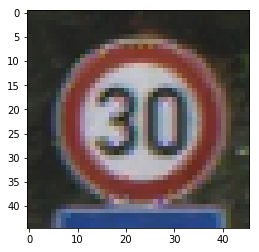

In [4]:
trainImages, trainLabels = readTrafficSigns("../data/train/GTSRB/Final_Training/Images")
print(len(trainLabels), len(trainImages))
plt.imshow(trainImages[500])
plt.show()

In [5]:
#print(trainImages[2])
#plt.imshow(trainImages[2])

def grayConversion(image):
    grayValue = 0.07 * image[:,:,0] + 0.72 * image[:,:,1] + 0.21 * image[:,:,2]
    gray_img = grayValue.astype(np.uint8)
    return gray_img



#plt.show()
final_images=[]
dim = (40, 40) 
for l in range(len(trainImages)):
    temp_img = (cv2.resize(trainImages[l], dim))
    final_images.append(rgb2gray(temp_img))

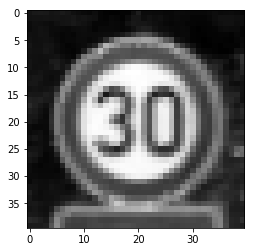

In [6]:
plt.imshow(final_images[500],  cmap='Greys_r')
plt.show()

In [7]:
X = np.array(final_images)
Y = np.array(trainLabels)
X =X.reshape([-1,40, 40,1])
print(X.shape)


(39209, 40, 40, 1)


In [17]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(1, activation='softmax'))

model.compile(loss='mean_squared_error', optimizer='sgd')
#model.summary()

model.fit(X, Y,epochs=20,verbose=1, batch_size = 128)

Epoch 1/20
39209/39209 [==============================] - 139s 4ms/step - loss: 363.0107
Epoch 2/20
39209/39209 [==============================] - 143s 4ms/step - loss: 363.0107
Epoch 3/20
39209/39209 [==============================] - 142s 4ms/step - loss: 363.0107
Epoch 4/20
39209/39209 [==============================] - 144s 4ms/step - loss: 363.0107
Epoch 5/20
39209/39209 [==============================] - 143s 4ms/step - loss: 363.0107
Epoch 6/20
39209/39209 [==============================] - 143s 4ms/step - loss: 363.0107
Epoch 7/20
39209/39209 [==============================] - 151s 4ms/step - loss: 363.0107
Epoch 8/20
39209/39209 [==============================] - 145s 4ms/step - loss: 363.0107
Epoch 9/20
39209/39209 [==============================] - 145s 4ms/step - loss: 363.0107
Epoch 10/20
39209/39209 [==============================] - 150s 4ms/step - loss: 363.0107
Epoch 11/20
39209/39209 [==============================] - 148s 4ms/step - loss: 363.0107
Epoch 12/20
39209/3

KeyboardInterrupt: 